<h1>Tugas Data Mining 1</h1
<br />
<ul>
    <li><b>Nama  : Al-Fariqy Raihan Azhwar</b></li>
    <li><b>NPM   : 202143501514</b></li>
    <li><b>Kelas : R6Q</b></li>
</ul>
<br />

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
!wget http://becomingvisual.com/python4data/tv.csv

--2024-03-23 06:52:37--  http://becomingvisual.com/python4data/tv.csv
Resolving becomingvisual.com (becomingvisual.com)... 107.180.58.30
Connecting to becomingvisual.com (becomingvisual.com)|107.180.58.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101449 (99K) [text/csv]
Saving to: ‘tv.csv’

tv.csv              100%[===================>]  99.07K   280KB/s    in 0.4s    

2024-03-23 06:52:37 (280 KB/s) - ‘tv.csv’ saved [101449/101449]



In [ ]:
tv_program_df = pd.read_csv('tv.csv')
tv_program_df.head(10)

,titleId,seasonNumber,title,date,av_rating,share,genres
0,tt0806901,44,Polizeiruf 110,2015,7.0000,0.00,"Crime,Drama"
1,tt0806901,40,Polizeiruf 110,2011,7.3595,0.02,"Crime,Drama"
2,tt0806901,39,Polizeiruf 110,2010,7.2000,0.01,"Crime,Drama"
3,tt0203259,20,Law & Order: Special Victims Unit,2018,8.6219,0.07,"Crime,Drama,Mystery"
4,tt0098844,20,Law & Order,2010,7.8286,0.28,"Crime,Drama,Mystery"
5,tt0203259,19,Law & Order: Special Victims Unit,2018,8.7060,0.63,"Crime,Drama,Mystery"
6,tt0098844,19,Law & Order,2009,7.7893,0.29,"Crime,Drama,Mystery"
7,tt0118401,19,Midsomer Murders,2017,7.3916,0.05,"Crime,Drama,Mystery"
8,tt0098844,18,Law & Order,2008,7.8470,0.31,"Crime,Drama,Mystery"
9,tt0203259,18,Law & Order: Special Victims Unit,2017,8.0010,0.28,"Crime,Drama,Mystery"


In [ ]:
tv_program_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   titleId       1634 non-null   object 
 1   seasonNumber  1634 non-null   int64  
 2   title         1634 non-null   object 
 3   date          1634 non-null   int64  
 4   av_rating     1634 non-null   float64
 5   share         1634 non-null   float64
 6   genres        1634 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 89.5+ KB


In [ ]:
tv_program_df.isna().sum()

titleId         0
seasonNumber    0
title           0
date            0
av_rating       0
share           0
genres          0
dtype: int64

In [ ]:
for col_name, val in tv_program_df.isna().sum().to_dict().items():
    if val > 0:
        first_val = tv_program_df[col_name].dropna().iloc[0]
        if type(first_val).__name__ == 'str':
            tv_program_df[col_name].fillna(
                value = tv_program_df[col_name].value_counts().idxmax(),
                inplace = True
            )
        else:
            avg = tv_program_df[col_name].mean()
            tv_program_df[col_name] = tv_program_df[col_name].fillna(avg)

tv_program_df.isna().sum()

titleId         0
seasonNumber    0
title           0
date            0
av_rating       0
share           0
genres          0
dtype: int64

In [ ]:
col_names : list = ['seasonNumber', 'av_rating', 'share']
scalers   : dict = {'Normalization': MinMaxScaler(), 'Standarization': StandardScaler()}

for s_name, s_obj in scalers.items():
    transform = s_obj.fit_transform(tv_program_df[col_names])
    print(f"| {s_name} |\n|{', '.join(col_names)}|\n{transform}\n\n")

| Normalization |
|seasonNumber, av_rating, share|
[[1.00000000e+00 6.27158728e-01 0.00000000e+00]
 [9.06976744e-01 6.79639713e-01 1.05540897e-03]
 [8.83720930e-01 6.56355382e-01 5.27704485e-04]
 ...
 [0.00000000e+00 6.41479686e-01 5.27704485e-04]
 [0.00000000e+00 6.40107444e-01 1.58311346e-03]
 [0.00000000e+00 7.53419658e-01 1.31926121e-02]]


| Standarization |
|seasonNumber, av_rating, share|
[[12.49126963 -1.70252908 -0.45705335]
 [11.26859407 -1.14855673 -0.44348063]
 [10.96292517 -1.39433862 -0.45026699]
 ...
 [-0.65249271 -1.55136166 -0.45026699]
 [-0.65249271 -1.56584661 -0.43669428]
 [-0.65249271 -0.36975943 -0.28739439]]




In [ ]:
tv_prgm_genres = []
for genres in tv_program_df['genres']:
  tv_prgm_genres.append(str(genres.split(',')))

tv_program_df['genres'] = tv_prgm_genres
tv_program_df.head(10)

,titleId,seasonNumber,title,date,av_rating,share,genres
0,tt0806901,44,Polizeiruf 110,2015,7.0000,0.00,"['Crime', 'Drama']"
1,tt0806901,40,Polizeiruf 110,2011,7.3595,0.02,"['Crime', 'Drama']"
2,tt0806901,39,Polizeiruf 110,2010,7.2000,0.01,"['Crime', 'Drama']"
3,tt0203259,20,Law & Order: Special Victims Unit,2018,8.6219,0.07,"['Crime', 'Drama', 'Mystery']"
4,tt0098844,20,Law & Order,2010,7.8286,0.28,"['Crime', 'Drama', 'Mystery']"
5,tt0203259,19,Law & Order: Special Victims Unit,2018,8.7060,0.63,"['Crime', 'Drama', 'Mystery']"
6,tt0098844,19,Law & Order,2009,7.7893,0.29,"['Crime', 'Drama', 'Mystery']"
7,tt0118401,19,Midsomer Murders,2017,7.3916,0.05,"['Crime', 'Drama', 'Mystery']"
8,tt0098844,18,Law & Order,2008,7.8470,0.31,"['Crime', 'Drama', 'Mystery']"
9,tt0203259,18,Law & Order: Special Victims Unit,2017,8.0010,0.28,"['Crime', 'Drama', 'Mystery']"


In [ ]:
print(f"{tv_program_df.describe(include='all')}\n")
print(f"{tv_program_df.isnull().sum()}\n")
print(f"{tv_program_df.duplicated().sum()}\n")

          titleId  seasonNumber           title         date    av_rating  \
count        1634   1634.000000            1634  1634.000000  1634.000000   
unique        711           NaN             708          NaN          NaN   
top     tt0413573           NaN  Criminal Minds          NaN          NaN   
freq           12           NaN              12          NaN          NaN   
mean          NaN      3.134639             NaN  2014.004284     8.104855   
std           NaN      3.272515             NaN     2.960753     0.649148   
min           NaN      1.000000             NaN  2008.000000     2.703900   
25%           NaN      1.000000             NaN  2012.000000     7.770400   
50%           NaN      2.000000             NaN  2015.000000     8.157650   
75%           NaN      4.000000             NaN  2017.000000     8.527850   
max           NaN     44.000000             NaN  2018.000000     9.554000   

              share                         genres  
count   1634.000000   

<h3>Jumlah Musim Terendah dan Terbanyak</h3>


In [ ]:
tv_program_df.sort_values(by='seasonNumber')

,titleId,seasonNumber,title,date,av_rating,share,genres
1633,tt3250026,1,Zoo,2015,7.8649,0.25,"['Drama', 'Mystery', 'Sci-Fi']"
1210,tt1299365,1,How to Make It in America,2010,7.2140,0.04,"['Comedy', 'Drama']"
1209,tt3205802,1,How to Get Away with Murder,2014,8.7374,1.14,"['Crime', 'Drama', 'Mystery']"
1208,tt1797404,1,House of Lies,2012,7.3035,0.23,"['Comedy', 'Drama']"
1207,tt1856010,1,House of Cards,2013,8.5615,2.80,['Drama']
...,...,...,...,...,...,...,...
4,tt0098844,20,Law & Order,2010,7.8286,0.28,"['Crime', 'Drama', 'Mystery']"
3,tt0203259,20,Law & Order: Special Victims Unit,2018,8.6219,0.07,"['Crime', 'Drama', 'Mystery']"
2,tt0806901,39,Polizeiruf 110,2010,7.2000,0.01,"['Crime', 'Drama']"
1,tt0806901,40,Polizeiruf 110,2011,7.3595,0.02,"['Crime', 'Drama']"


In [ ]:
print(f"\n[ 10 Terendah ] \n\n{tv_program_df.nsmallest(10, 'seasonNumber')}\n\n")
print(f"[ 10 Terbanyak ] \n\n{tv_program_df.nlargest(10, 'seasonNumber')}")


[ 10 Terendah ] 

        titleId  seasonNumber                           title  date  \
995   tt1225901             1                           90210  2009   
996   tt2879552             1                        11.22.63  2016   
997   tt3148266             1                      12 Monkeys  2015   
998   tt1837492             1                  13 Reasons Why  2017   
999   tt5345490             1                      24: Legacy  2017   
1000  tt1598754             1            24: Live Another Day  2014   
1001  tt2197797             1                 666 Park Avenue  2013   
1002  tt1820742             1                    A Gifted Man  2011   
1003  tt4834206             1  A Series of Unfortunate Events  2017   
1004  tt4074084             1        A.D. The Bible Continues  2015   

      av_rating  share                             genres  
995      7.1735   0.40     ['Comedy', 'Drama', 'Romance']  
996      8.4890   0.51     ['Drama', 'Mystery', 'Sci-Fi']  
997      8.3407   0

<h3>Rating Terendah dan Tertinggi</h3>

In [ ]:
tv_program_df.sort_values(by='av_rating')

,titleId,seasonNumber,title,date,av_rating,share,genres
1126,tt4447390,1,Doubt,2017,2.7039,0.09,['Drama']
1412,tt5165412,1,Still Star-Crossed,2017,2.9117,0.06,['Drama']
202,tt1086761,6,Keeping Up with the Kardashians,2011,3.9000,0.01,"['Drama', 'Reality-TV']"
474,tt2477230,4,The Night Shift,2017,4.4073,0.08,"['Drama', 'Romance']"
565,tt4655480,3,Chicago Med,2018,4.5872,0.74,['Drama']
...,...,...,...,...,...,...,...
408,tt0976014,4,Greek,2011,9.4000,0.01,"['Comedy', 'Drama']"
398,tt0944947,4,Game of Thrones,2014,9.4282,11.07,"['Action', 'Adventure', 'Drama']"
252,tt3398228,5,BoJack Horseman,2018,9.4738,0.45,"['Animation', 'Comedy', 'Drama']"
191,tt0944947,6,Game of Thrones,2016,9.4943,15.18,"['Action', 'Adventure', 'Drama']"


In [ ]:
print(f"\n[ 10 Terendah ] \n\n{tv_program_df.nsmallest(10, 'av_rating')}\n\n")
print(f"[ 10 Tertinggi ] \n\n{tv_program_df.nlargest(10, 'av_rating')}")


[ 10 Terendah ] 

        titleId  seasonNumber                            title  date  \
1126  tt4447390             1                            Doubt  2017   
1412  tt5165412             1               Still Star-Crossed  2017   
202   tt1086761             6  Keeping Up with the Kardashians  2011   
474   tt2477230             4                  The Night Shift  2017   
565   tt4655480             3                      Chicago Med  2018   
1329  tt5500906             1                      Pure Genius  2016   
1069  tt5827228             1                             Bull  2017   
968   tt1697033             2                     True Justice  2012   
819   tt5707802             2                Dear White People  2018   
667   tt2477230             3                  The Night Shift  2016   

      av_rating  share                        genres  
1126     2.7039   0.09                     ['Drama']  
1412     2.9117   0.06                     ['Drama']  
202      3.9000   0.01 

<h3>Rekomendasi Berdasarkan Genre, Rating, dan Musim</h3>


In [ ]:
def recommendation(genre: str = 'crime', range: int = 10):
    filtered_df = tv_program_df[
        tv_program_df['genres'].str.contains(genre, case = False)
    ]
    sorted_df = filtered_df.sort_values(
        by = ['av_rating', 'seasonNumber'], ascending = False
    )
    return sorted_df.head(range)

In [ ]:
import ast

print(f"| Genres |\n")
tv_program_genres = []

for genres_str in tv_program_df['genres']:
    genres_list = ast.literal_eval(genres_str)
    for genre in genres_list:
        if genre not in tv_program_genres:
            tv_program_genres.append(genre)
            print(f"+ {genre}")

| Genres |

+ Crime
+ Drama
+ Mystery
+ Romance
+ Fantasy
+ Horror
+ Animation
+ Comedy
+ Adventure
+ Family
+ Sci-Fi
+ Action
+ Thriller
+ Sport
+ History
+ Music
+ Reality-TV
+ War
+ Biography
+ Musical
+ Documentary
+ Western


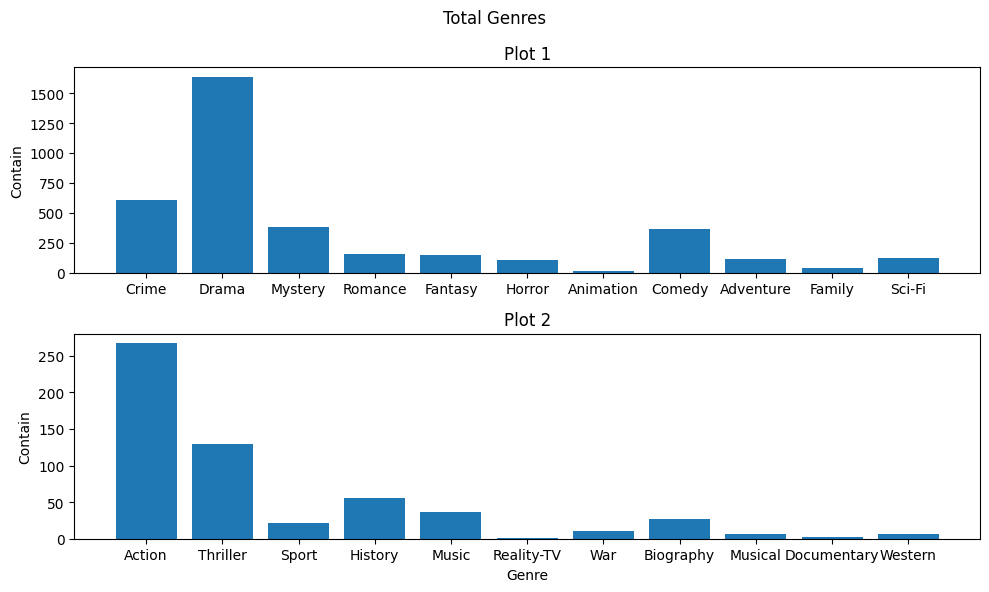

In [ ]:
contain_genres = [len(tv_program_df[tv_program_df['genres'].str.contains(genre, case = False)]) for genre in tv_program_genres]

num_plots = 2

chunk_size      = len(tv_program_genres) // num_plots
chunks_genres   = [tv_program_genres[i:i+chunk_size] for i in range(0, len(tv_program_genres), chunk_size)]
chunks_contains = [contain_genres[i:i+chunk_size] for i in range(0, len(contain_genres), chunk_size)]

fig, axes = plt.subplots(num_plots, 1, figsize=(10, 6))

for i, (genres_chunk, contains_chunk) in enumerate(zip(chunks_genres, chunks_contains)):
    ax = axes[i]
    ax.bar(genres_chunk, contains_chunk)
    ax.set_ylabel('Contain')
    ax.set_title(f'Plot {i + 1}')

plt.xlabel('Genre')

plt.suptitle('Total Genres')

plt.tight_layout()

plt.show()

In [ ]:
for genre in tv_program_genres:
  tv_programs_rec = recommendation(
      genre = genre,
      range = 50
  )
  print(f"[ Recomendation TV Program in Genre {genre} ]\n{tv_programs_rec}\n\n")

[ Recomendation TV Program in Genre Crime ]
        titleId  seasonNumber                              title  date  \
245   tt0903747             5                       Breaking Bad  2013   
1578  tt2356777             1                     True Detective  2014   
314   tt1839578             5                 Person of Interest  2016   
905   tt1475582             2                           Sherlock  2012   
491   tt2433738             4                          Wentworth  2016   
783   tt2243973             2                           Hannibal  2014   
613   tt4158110             3                          Mr. Robot  2017   
688   tt2433738             3                          Wentworth  2015   
627   tt1839578             3                 Person of Interest  2014   
180   tt2149175             6                      The Americans  2018   
1476  tt1437351             1            The Fugitive Chronicles  2010   
441   tt1839578             4                 Person of Interest  20

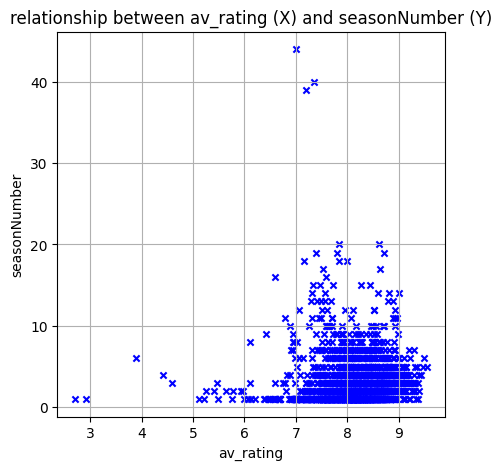

In [ ]:
tv_program_df.plot(
    kind    = 'scatter',
    x       = 'av_rating',
    y       = 'seasonNumber',
    color   = 'blue',
    marker  = 'x',
    figsize = (5, 5)
)

plt.title(label = 'relationship between av_rating (X) and seasonNumber (Y)')
plt.xlabel('av_rating')
plt.ylabel('seasonNumber')

plt.grid(True)
plt.show()